- 교재 3장 정리

### 2차원 데이터의 정리

#### 두 데이터 사이의 관계를 나타내는 지표

In [3]:
import numpy as np
import pandas as pd

%precision 3
pd.set_option('precision', 3)

In [5]:
df = pd.read_csv('../data/data/ch2_scores_em.csv',
                 index_col='student number')


In [6]:
en_scores = np.array(df['english'])[:10]
ma_scores = np.array(df['mathematics'])[:10]

scores_df = pd.DataFrame({'english':en_scores,
                          'mathematics':ma_scores},
                         index=pd.Index(['A', 'B', 'C', 'D', 'E',
                                         'F', 'G', 'H', 'I', 'J'],
                                        name='student'))
scores_df


,english,mathematics
student,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76
F,48,60
G,65,81
H,49,66
I,65,78


- 10명의 학생들의 영어 점수와 수학점수의 관게 확인을 위해서 scatter 그래프 그림

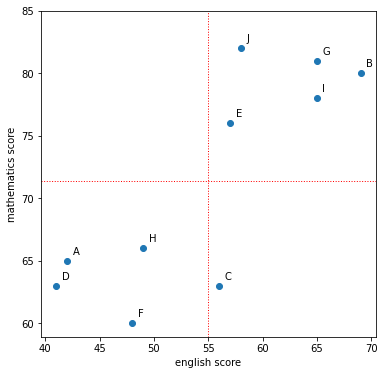

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))

plt.scatter(scores_df['english'], scores_df['mathematics'])

plt.xticks([40,45,50,55,60,65,70])
plt.xlabel('english score')
plt.ylabel('mathematics score')
plt.yticks([60,65,70,75,80,85])


for i in range(0, len(scores_df)):
    plt.text(scores_df['english'][i]+0.5,scores_df['mathematics'][i]+0.5,scores_df.index[i])

    
    
# 수직선: plt.axvline(x,color = ....)
plt.axvline(x=scores_df['english'].mean(),color = 'red', linewidth = 1, linestyle =':' )
# 수평선: plt.axhline(y,color = ...)
plt.axhline(y=scores_df['mathematics'].mean(),color = 'red', linewidth = 1, linestyle =':' )

### 共分散(공분산)

- 보통 Cov 라고 표현한다. 공분산은 두 개 또는 그 이상의 랜덤 변수에 대한 의존성을 의미

- 직사각형의 가로길이는 영어 점수의 편차, 세로는 수학 점수의 편차
- 공분산은 면적, 음의 면적도 가능(음의 상관)
- 아래 그림에서 H와 E의 면적은 양의 값(양의 상관관계),  C는 음의 값(음의 상관관계)

![](공분산.jpg)

In [17]:
# 각 과목의 편차 및 과목간 공분산

summary_df = scores_df.copy()
summary_df['english_deviation'] =\
    summary_df['english'] - summary_df['english'].mean()
summary_df['mathematics_deviation'] =\
    summary_df['mathematics'] - summary_df['mathematics'].mean()
summary_df['product of deviations'] =\
    summary_df['english_deviation'] * summary_df['mathematics_deviation']
summary_df

,english,mathematics,english_deviation,mathematics_deviation,product of deviations
student,,,,,
A,42,65,-13.0,-6.4,83.2
B,69,80,14.0,8.6,120.4
C,56,63,1.0,-8.4,-8.4
D,41,63,-14.0,-8.4,117.6
E,57,76,2.0,4.6,9.2
F,48,60,-7.0,-11.4,79.8
G,65,81,10.0,9.6,96.0
H,49,66,-6.0,-5.4,32.4
I,65,78,10.0,6.6,66.0


In [18]:
summary_df['product of deviations'].mean()
#공분산의 평균이 62.8이므로 영어와 수학은 양의 상관관계에 있다.

62.800

#### numpy의 공분산 함수: cov(data1, data2, ddof=)
- 반환값: 공분산 행렬
- 반환 행렬 중 [0,1]과 [1,0]의 원소가공분산 값

\begin{pmatrix}
  {영어,영어} & {영어,수학} \\
  {수학,영어} & {수학,수학}
\end{pmatrix}


In [19]:
en_scores
ma_scores

array([65, 80, 63, 63, 76, 60, 81, 66, 78, 82], dtype=int64)

In [21]:
cov_mat = np.cov(en_scores,ma_scores, ddof=0)
cov_mat

array([[86.  , 62.8 ],
       [62.8 , 68.44]])

In [22]:
## 각 과목의 분산 값
cov_mat[0,0],cov_mat[1,1]

(86.0, 68.44000000000001)

In [23]:
np.var(en_scores,ddof=0), np.var(ma_scores,ddof=0)

(86.0, 68.44000000000001)

### 상관계수


- 공분산의 단위는 직감적으로 이해하기 어려우므로, 단위에 의존하지 않는 상관을 나타내는 지표
    - 시험 점수간의 공분산 (점수X점수), 키와 점수간의 공분산 (cm X 점수)
- 상관계수는 공분산을 각 데이터의 표준편차로 나누어 단위에 의존하지 않음

![](상관계수수식.png)

- 양의 상관은 1에 가까워지고, 음의 상관은 -1에 가까워짐, 무상관은 0

In [26]:
# 수식으로 계산
np.cov(en_scores, ma_scores, ddof=0)[0,1]/(np.std(en_scores)*np.std(ma_scores))

0.8185692341186713

#### 상관계수 함수(np.correcoef(x,y)/df.corr())

In [28]:
np.corrcoef(en_scores,ma_scores) # 수학 점수와 영어 점수의 상관계수 : 0.819

array([[1.   , 0.819],
       [0.819, 1.   ]])

In [29]:
# 데이터 프레임에 적용
scores_df.corr()

,english,mathematics
english,1.000,0.819
mathematics,0.819,1.000


- 양의 상관은 1에 가까워지고, 음의 상관은 -1에 가까워지고, 무상관은 0
- 상관계수가 -1일 때와 1일때 데이터는 완전히 직선상에 놓임

![](상관계수예시.jpg)


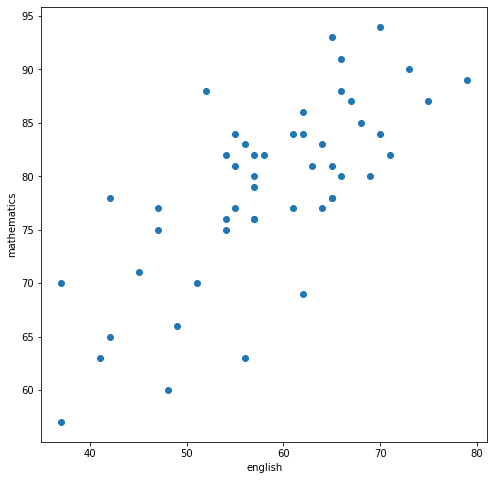

In [46]:
english_scores = np.array(df['english'])
math_scores = np.array(df['mathematics'])

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
# 산점도
ax.scatter(english_scores, math_scores)
ax.set_xlabel('english')
ax.set_ylabel('mathematics')

plt.show()


### 회귀 직선

![](회귀직선수식.png)

In [49]:
#기울기와 절편
poly_fit = np.polyfit(english_scores, math_scores,1)

poly_1d = np.poly1d(poly_fit)

#직선을 그리기 위해 x좌표를 생성
xs = np.linspace(english_scores.min(), english_scores.max())

##xs에 대응하는 y좌표를 구현
ys = poly_1d(xs)

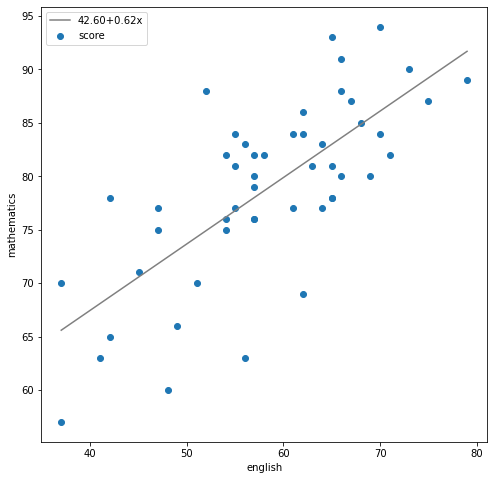

In [50]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.set_xlabel('english')
ax.set_ylabel('mathematics')
ax.scatter(english_scores, math_scores, label='score')
ax.plot(xs, ys, color='gray',
        label=f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')
# 범례의 표시
ax.legend(loc='upper left')

plt.show()


### 히트맵

- 히스토그램의 2차원 버전으로 색을 이용해 표현하는 그래프
- 영어 점수 35점부터 80점, 수학 점수 55점부터 95점까지 5점 간격


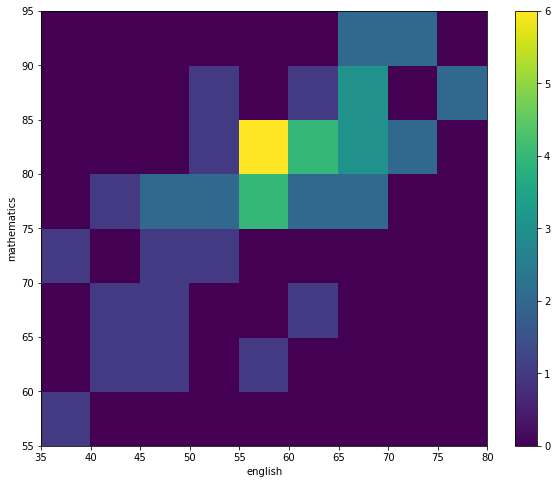

In [48]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

c = ax.hist2d(english_scores, math_scores,
              bins=[9, 8], range=[(35, 80), (55, 95)])

c[3]
ax.set_xlabel('english')
ax.set_ylabel('mathematics')
ax.set_xticks(c[1])
ax.set_yticks(c[2])

# 컬러 바의 표시
fig.colorbar(c[3],ax=ax)
plt.show()
